# Minimisation d'une fonction

In [1]:
%pylab inline
import tensorflow as tf

Populating the interactive namespace from numpy and matplotlib


In [34]:
s = tf.InteractiveSession()

In [35]:
x = tf.Variable(1.0)

In [36]:
z = (x-10.0)**2+(x-20.0)**2

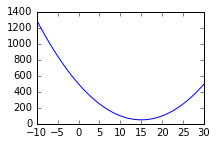

In [37]:
v = linspace(-10,30,100)
figure(figsize=(3,2))
plot(v,(v-10.0)**2+(v-20.0)**2)

### Utilisation d'une algorithme inclus dans tensorflow

In [38]:
minimizer = tf.train.AdamOptimizer(1.0).minimize(z)

In [39]:
init = tf.global_variables_initializer()
s.run( init )

In [40]:
s.run( x ) , s.run( z )

(1.0, 442.0)

In [41]:
for i in range(200):
    s.run( minimizer )

In [42]:
s.run( x ) , s.run( z )

(15.000025, 50.0)

### Descente de gradient 'a la main'

#### Operation d'affectation

In [43]:
op = tf.assign(x,x+1)

In [44]:
s.run(init)

In [45]:
s.run(op)
s.run(x)

2.0

#### Algorithme

In [46]:
g = tf.gradients(z,x)
g = g[0]

In [47]:
s.run( init )

In [90]:
print("x=",  s.run( x ) )
print("z=",  s.run( z ) )
print("g=",  s.run( g ) )

('x=', 14.999999)
('z=', 50.0)
('g=', -3.8146973e-06)


In [49]:
update = tf.assign( x , x - 0.1*g)

In [89]:
for i in range(1000):
    s.run(update)

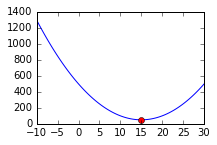

In [91]:
# Affichage
figure(figsize=(3,2))
plot(v,(v-10.0)**2+(v-20.0)**2,[s.run(x)],[s.run(z)],'ro')

### Exercice

* definir sa propre fonction a minimiser